In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [2]:
path = pd.read_csv('atus_anual_2018.csv')
df=path.loc [:,['MES','ID_HORA','ID_MINUTO','TIPACCID','DIASEMANA']]
df.head()

,MES,ID_HORA,ID_MINUTO,TIPACCID,DIASEMANA
Municipal,14,45,12,0,Accidente en intersección
Municipal,14,20,12,0,Accidente en intersección
Municipal,15,50,12,0,Accidente en intersección
Municipal,20,15,12,1,Accidente en intersección
Municipal,12,0,1,0,Accidente en intersección


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381708 entries, Municipal to Municipal
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   MES        381708 non-null  int64 
 1   ID_HORA    381708 non-null  int64 
 2   ID_MINUTO  381708 non-null  int64 
 3   TIPACCID   381708 non-null  int64 
 4   DIASEMANA  381708 non-null  object
dtypes: int64(4), object(1)
memory usage: 17.5+ MB


In [4]:
df = df.iloc[:500]


In [5]:
df

,MES,ID_HORA,ID_MINUTO,TIPACCID,DIASEMANA
Municipal,14,45,12,0,Accidente en intersección
Municipal,14,20,12,0,Accidente en intersección
Municipal,15,50,12,0,Accidente en intersección
Municipal,20,15,12,1,Accidente en intersección
Municipal,12,0,1,0,Accidente en intersección
...,...,...,...,...,...
Municipal,19,40,21,1,Accidente en intersección
Municipal,9,30,22,1,Accidente en intersección
Municipal,7,55,22,3,Accidente en intersección
Municipal,9,30,22,0,Accidente en intersección


In [6]:
df.DIASEMANA .unique()

array(['Accidente en intersección', 'Sin accidente en esta zona'],
      dtype=object)

In [7]:
all_variables= df.columns
features = list(df)
features.remove('DIASEMANA')
target= ['DIASEMANA']

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,MES,ID_HORA,ID_MINUTO,TIPACCID
0,0.608696,0.762712,0.387097,0.000000
1,0.608696,0.338983,0.387097,0.000000
2,0.652174,0.847458,0.387097,0.000000
3,0.869565,0.254237,0.387097,0.333333
4,0.521739,0.000000,0.032258,0.000000


In [9]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,MES,ID_HORA,ID_MINUTO,TIPACCID
0,17.760558,-3.780060,-1.932275,-1.051240
1,-7.195954,-2.319896,-2.124841,-0.993192
2,22.759424,-4.074969,-2.893704,-1.055838
3,-12.139655,-2.046015,-8.155979,0.060461
4,-27.819006,-12.127184,-0.252346,-0.969360


In [10]:

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.70786989, 0.17174633, 0.11917986, 0.00120391])

In [11]:
df[target]


,DIASEMANA
Municipal,Accidente en intersección
Municipal,Accidente en intersección
Municipal,Accidente en intersección
Municipal,Accidente en intersección
Municipal,Accidente en intersección
...,...
Municipal,Accidente en intersección
Municipal,Accidente en intersección
Municipal,Accidente en intersección
Municipal,Accidente en intersección


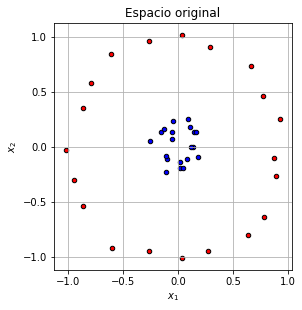

In [12]:
np.random.seed(0)
X, y = make_circles(n_samples=40, factor=.2, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

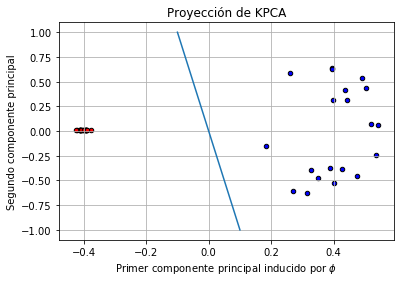

In [13]:

kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(-0.1*x,x,linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()